In [1]:
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

# 读取图像

In [39]:
img = cv2.imread('lena.jpg')
#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

# 线性点运算

## 灰度上移变换

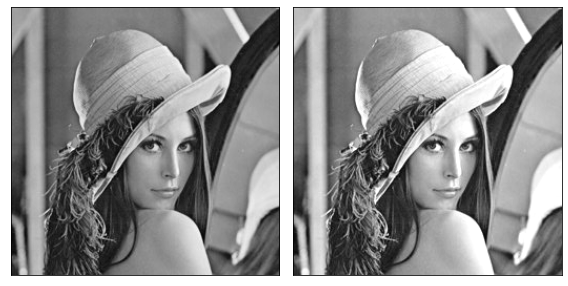

In [48]:
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        if (int(grayImage[i,j]+50) > 255):
            gray = 255
        else:
            gray = int(grayImage[i,j]+50)
        result[i,j] = np.uint8(gray)
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## 对比度增强变换

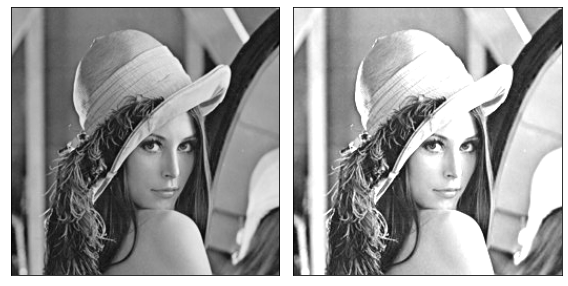

In [43]:
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        if (int(grayImage[i,j]*1.5) > 255):
            gray = 255
        else:
            gray = int(grayImage[i,j]*1.5)
        result[i,j] = np.uint8(gray)
#显示图像
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## 对比度减弱变换

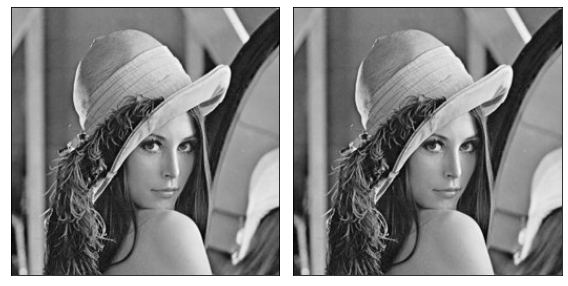

In [65]:
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        gray = int(grayImage[i,j]*0.8)
        result[i,j] = np.uint8(gray)
#显示图像
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## 反色变换

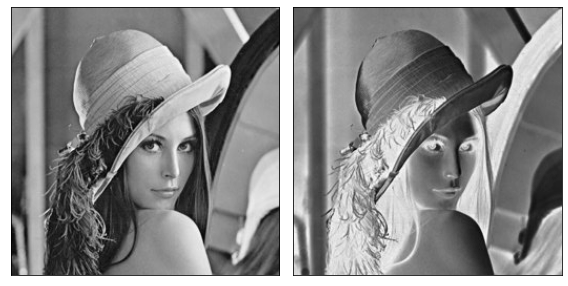

In [64]:
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        gray = 255 - grayImage[i,j]
        result[i,j] = np.uint8(gray)
#显示图像
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# 分段线性点运算

### 对比度拉伸

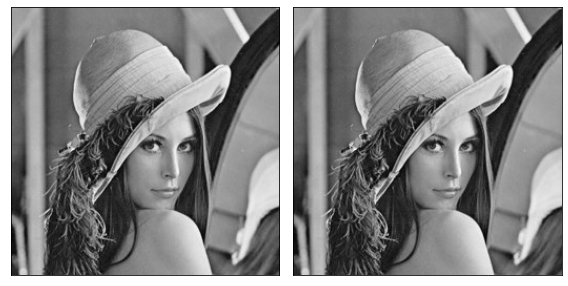

In [63]:
#把灰度级由原来的线性拉伸到整个范围[0, 255]
r_min, r_max = 255, 0
for i in range(height):
    for j in range(width):
        if grayImage[i, j] > r_max:
            r_max = grayImage[i, j]
        if grayImage[i, j] < r_min:
            r_min = grayImage[i, j]
r1, s1 = r_min, 0
r2, s2 = r_max, 255

result = np.zeros((height, width), dtype=np.uint8)
k1 = s1/r1
k3 = (255-s2)/(255-r2)
k2 = (s2 - s1)/(r2 - r1)
for i in range(height):
    for j in range(width):
        if r1 <= grayImage[i, j] <= r2:
            result[i, j] = k2*(grayImage[i, j] - r1)
        elif grayImage[i, j] < r1:
            result[i, j] = k1*grayImage[i, j]
        elif grayImage[i, j] > r2:
            result[i, j] = k3*(grayImage[i, j] - r2)
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 阈值处理

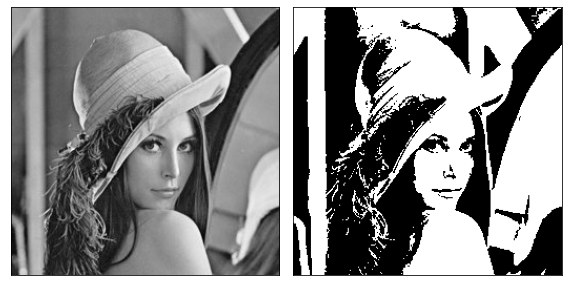

In [62]:
#阈值处理函数：当r1=r2, s1=0, s2=L-1时，此时分段线性函数便是阈值处理函数
plist = []
for i in range(height):
    for j in range(width):
        plist.append(grayImage[i, j])
r_avg = int(sum(plist)/len(plist))
result = np.zeros((height, width), dtype=np.uint8)
for i in range(grayImage.shape[0]):
    for j in range(grayImage.shape[1]):
        if grayImage[i, j] < r_avg:
            result[i, j] = 0
        else:
            result[i, j] = 255
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### 灰度级分层

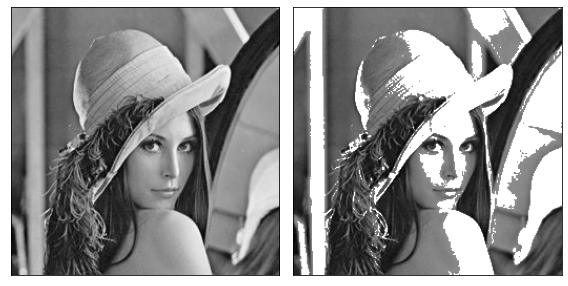

In [61]:

r_left, r_right = 150, 230
r_min, r_max = 0, 255
result = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if r_left <= grayImage[i, j] <= r_right:
            result[i, j] = r_max
        else:
            result[i, j] = grayImage[i, j]
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# 非线性点运算

## 对数变换

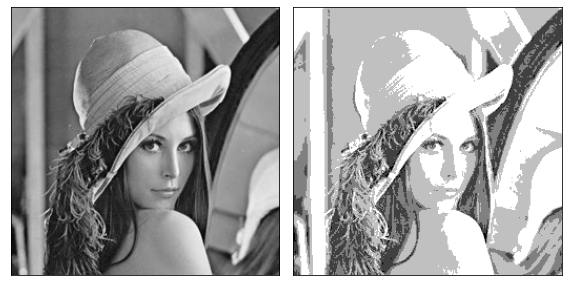

In [66]:
def log(c, img):
    result = c * np.log(1.0 + img)
    return result
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        result[i,j] = log(2,grayImage[i,j])
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## 幂次变换

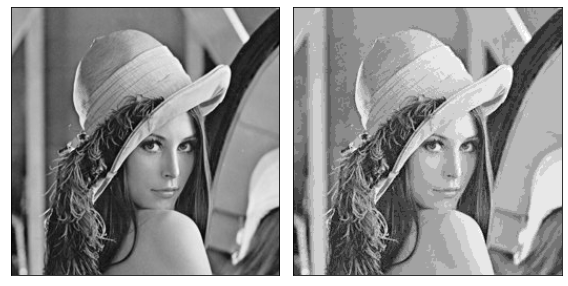

In [69]:
result = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        gray = int(grayImage[i,j]**0.5)
        result[i,j] = np.uint8(gray)
plt.figure(figsize=(8, 10))
plt.subplot(1,2,1), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()